In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/DataMining/Study/DataMining

/content/drive/MyDrive/Colab Notebooks/DataMining/Study/DataMining


In [ ]:
!git config --global user.email 'gksdusql94@gmail.com'
!git config --global user.name 'gksdusql94'

In [ ]:
!git add PythonDataHandling.ipynb

fatal: pathspec 'PythonDataHandling.ipynb' did not match any files


In [ ]:
!git commit -m '원하는 아무 메시지'
!git push

On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)
error: src refspec refs/heads/main does not match any
error: failed to push some refs to 'https://github.com/gksdusql94/DataMining.git'


# Predicting Home Prices

The [Ames Housing Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) was introduced by Professor Dean De Cock in 2011 for use in data science education. It contains 2,919 observations of housing sales in Ames, Iowa between 2006 and 2010. There are a total of 79 features describing each house's size, quality, area, age, and other miscellaneous attributes.

From Kaggle:

>Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Overall Understanding of the Data
In this section, you will need to complete the following tasks:
- Load the dataset as a pandas data frame.
- Display key information of the data.
- Handle missing values.

1.1 In the cell below, import the `pandas` library and load file `train.csv` from the Ames housing dataset as a data frame.

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataMining/Study/train.csv", on_bad_lines='skip')
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

1.2 Display the first 5 rows of the data frame.

In [ ]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


1.3 Display the shape of the data frame and list all column names.

In [ ]:
# Print the shape of the data frame
print("Shape of the DataFrame:",df.shape)

# list all column names.
column_names = df.columns.tolist() #열 이름을 >> 리스트로 변환하는 메서드 입니다.
print("Column names:", column_names)

# Shape of the data frame
print(df.count(), len(df.columns))


Shape of the DataFrame: (1460, 81)
Column names: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',

1.4 Display the number of missing values in each column.

In [ ]:
missing_values = df.isnull().sum()

print("Number of missing values in each column:")
print(missing_values)


Number of missing values in each column:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


1.5 Remove all the columns that contain missing values.

In [ ]:
df_drop =df.dropna(axis=1)
print(df_drop.head())

   Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   
2   3          60       RL    11250   Pave      IR1         Lvl    AllPub   
3   4          70       RL     9550   Pave      IR1         Lvl    AllPub   
4   5          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    Inside       Gtl  ...             0         0           0        0   
1       FR2       Gtl  ...             0         0           0        0   
2    Inside       Gtl  ...             0         0           0        0   
3    Corner       Gtl  ...           272         0           0        0   
4       FR2       Gtl  ...             0         0           0        0   

  MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0       0       2    20

## 2. Study Key Features

The total number of features seems overwhelming, so let's start with a few features that we know are definitely relevant:
1. `OverallQual`: Overall material and finish quality
2. `YearBuilt`: Original construction date
3. `TotalBsmtSF`: Total basement area in square feet
4. `GrLivArea`: Above ground living area in square feet

and don't forget `SalePrice`.

For each of these 5 features, please find:
- Descriptive statistics
- Graphical representation of their distribution
- Check for outliers
- Study correlations

2.1 **Descriptive statistics**: For each of the 5 features, find its minimum, maximum, mean, and standard deviation.

In [ ]:
#method 1
import pandas as pd
selected_columns = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']
data = df[selected_columns]

statistics = data.describe()
print(statistics)

       OverallQual    YearBuilt  TotalBsmtSF    GrLivArea      SalePrice
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000
mean      6.099315  1971.267808  1057.429452  1515.463699  180921.195890
std       1.382997    30.202904   438.705324   525.480383   79442.502883
min       1.000000  1872.000000     0.000000   334.000000   34900.000000
25%       5.000000  1954.000000   795.750000  1129.500000  129975.000000
50%       6.000000  1973.000000   991.500000  1464.000000  163000.000000
75%       7.000000  2000.000000  1298.250000  1776.750000  214000.000000
max      10.000000  2010.000000  6110.000000  5642.000000  755000.000000


In [ ]:
#method 2
min_values = data.min()
max_values = data.max()
mean_values = data.mean()
std_deviation = data.std()

print("Minimum values:")
print(min_values)
print("\nMaximum values:")
print(max_values)
print("\nMean values:")
print(mean_values)
print("\nStandard Deviation:")
print(std_deviation)

Minimum values:
OverallQual        1
YearBuilt       1872
TotalBsmtSF        0
GrLivArea        334
SalePrice      34900
dtype: int64

Maximum values:
OverallQual        10
YearBuilt        2010
TotalBsmtSF      6110
GrLivArea        5642
SalePrice      755000
dtype: int64

Mean values:
OverallQual         6.099315
YearBuilt        1971.267808
TotalBsmtSF      1057.429452
GrLivArea        1515.463699
SalePrice      180921.195890
dtype: float64

Standard Deviation:
OverallQual        1.382997
YearBuilt         30.202904
TotalBsmtSF      438.705324
GrLivArea        525.480383
SalePrice      79442.502883
dtype: float64


2.2 **Distribution**: For each of the 5 features, generate a histogram. Choose the number of bins properly.

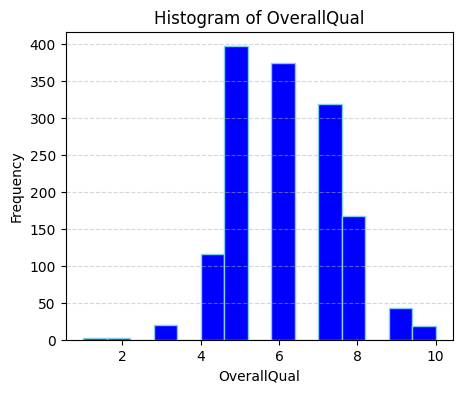

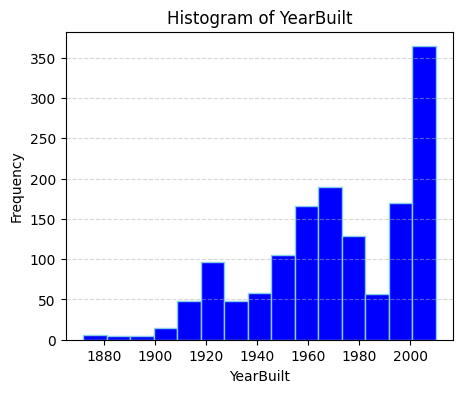

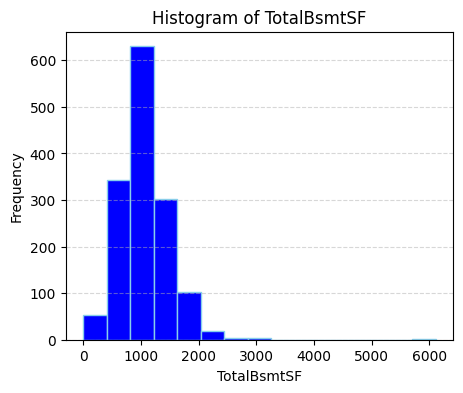

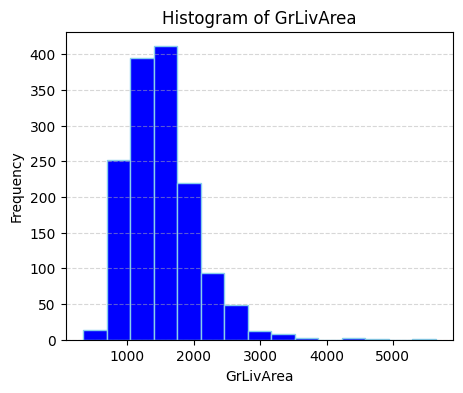

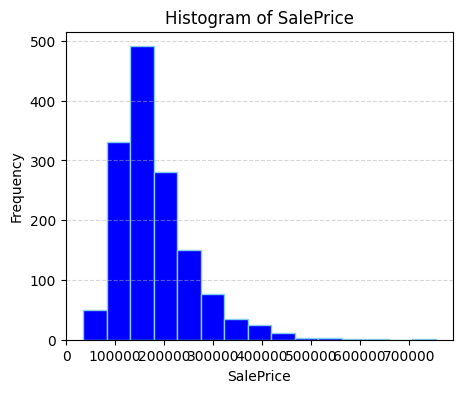

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

selected_columns = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']

for column in selected_columns:
    plt.figure(figsize=(5, 4))
    plt.hist(df[column], bins=15, color='blue', edgecolor='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()


2.3 **Outliers**: An **outlier** is a value that is located far away from the vast majority of the data. Remove those rows that contain outliers.

In [ ]:
lower_quantile = 0.05 # 5%
upper_quantile = 0.95

# Loop through the selected columns and remove outliers
for column in selected_columns:
    # Calculate lower and upper limits based on quantiles
    lower_limit = df[column].quantile(lower_quantile)
    upper_limit = df[column].quantile(upper_quantile)
    # Create a filter to identify rows without outliers
    filter = (df[column] >= lower_limit) & (df[column] <= upper_limit)

    # Apply the filter to the DataFrame to remove outliers
    df = df[filter] #너무 왜곡되지 않게제거하는 것.

2.4 **Correlation with sale price**: For each of the 4 chosen predictive features, draw a scatter plot of this feature and `SalePrice`. Set the title, axis label of the graph properly.

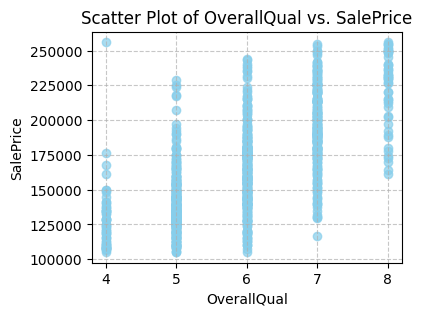

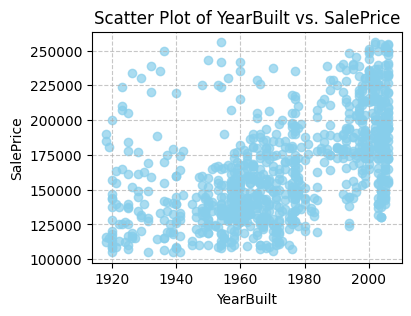

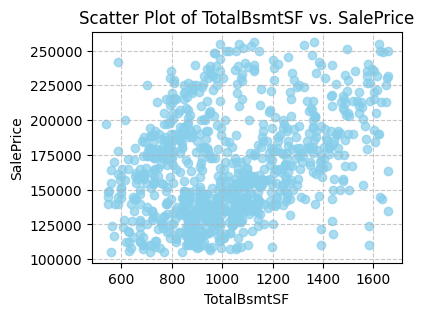

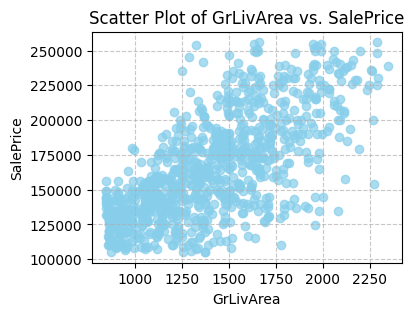

In [ ]:
selected_features = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']
target_feature = 'SalePrice'
correlation_matrix = data.corr()

for feature in selected_features:
    plt.figure(figsize=(4, 3))
    plt.scatter(df[feature], df[target_feature], alpha=0.7, color='skyblue')
    plt.title(f'Scatter Plot of {feature} vs. {target_feature}')
    plt.xlabel(feature)
    plt.ylabel(target_feature)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Describe the correlation between each predictive feature and `SalePrice`. Is there a positive correclation, a negative correlation, or no correlation?

In [ ]:
selected_features = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']
target_feature = 'SalePrice'

correlations = df[selected_features + [target_feature]].corr() # 주어진 특징과 목표 특징 간의 상관 관계 계산

print(correlations)

             OverallQual  YearBuilt  TotalBsmtSF  GrLivArea  SalePrice
OverallQual     1.000000   0.519463     0.150238   0.478158   0.691180
YearBuilt       0.519463   1.000000     0.214958   0.187600   0.538400
TotalBsmtSF     0.150238   0.214958     1.000000   0.092739   0.345117
GrLivArea       0.478158   0.187600     0.092739   1.000000   0.679102
SalePrice       0.691180   0.538400     0.345117   0.679102   1.000000


## 3. Identify Additional Predictive Feature
Let’s find out if other features are helpful to the price prediction. Additional features can be identified in the following ways:
- Calculate correlation coefficient between `SalePrice` and an existing feature.
- Create new features from existing features.

3.1 Calculate the correlation coefficient of each feature with `SalePrice` (excluding `SalePrice` itself). Identify the feature (other than the 4 features studied in the previous section) that has the strongest correlation with the sale prices.

In [ ]:
remaining_features = [col for col in df.columns if col != target_feature] #목표 특성(SalePrice)을 제외한 특성['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']

# Calculate correlation coefficients with 'SalePrice'
correlation_results = {}
for feature in remaining_features:
    if df[feature].dtype in ['int64', 'float64']:
      correlation = df[feature].corr(df[target_feature])
    correlation_results[feature] = correlation

# Find the feature with the strongest correlation
strongest_correlation_feature = max(correlation_results, key=lambda k: abs(correlation_results[k]))
strongest_correlation_coefficient = correlation_results[strongest_correlation_feature]

print(f"The feature with the strongest correlation with SalePrice is '{strongest_correlation_feature}' with a correlation coefficient of {strongest_correlation_coefficient:.2f}.")

The feature with the strongest correlation with SalePrice is 'OverallQual' with a correlation coefficient of 0.69.


3.2 **Feature engineering**: Based on our experience, the total area of the house and the average area per room should also be important factors in determining the price. Please create these two columns using the following formula:

1. total area = total area above ground (“GrLivArea”) + total basement area (“TotalBsmtSF”)
2. area per room = total area above ground (“GrLivArea”) / number of rooms (“TotRmsAbvGrd”).


In [ ]:
df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF']

df['AreaPerRoom'] = df['GrLivArea'] / df['TotRmsAbvGrd']
print(df[['TotalArea', 'AreaPerRoom']].head())

   TotalArea  AreaPerRoom
0       2566   213.750000
1       2524   210.333333
2       2706   297.666667
4       3343   244.222222
5       2158   272.400000


Up to this point, you should have obtained 7 features that are helpful to predict the sale price: `OverallQual`, `YearBuilt`, `TotalBasmtSF`, `GrLivArea`, `TotalArea`, `AreaPerRoom`, and a feature selected in 3.1. Create a new data frame with `SalePrice` and these 7 features only. Save the data as a CSV file named `HousingData_processed.csv` on your computer.

In [ ]:
selected_features = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'TotalArea', 'AreaPerRoom', strongest_correlation_feature]

df_processed = df[selected_features]
df_processed.to_csv("HousingData_processed.csv", index=False)

print("Data has been saved as HousingData_processed.csv")

Data has been saved as HousingData_processed.csv


## 4. Calculate Feature Statistics

Let's apply the **k-nearest-neighbor method** to this dataset and estimate the price of a house in the test set:

- OverallQual: 5
- YearBuilt: 1961
- TotalBsmtSF: 882
- GrLivArea: 896

Additional information about this house is on the first row of `test.csv`. The ID of this house in the data set is 1461.

The core idea of the k-nearest-neighbor method is to find existing houses that are most similar to the house with unknown price. Since similar houses should be priced similarly, their average price can be used as a good estimate on the price of the new house.

In order to conduct this estimation, we need to normalize the columns using the mean value and the standard deviation of each of the seven predictive features. These features include `OverallQual`, `YearBuilt`, `TotalBsmtSF`, `GrLivArea`, `TotalArea`, `AreaPerRoom`, and the feature you selected using correlation coefficient.

Transform each column with the following formula:
$$ \textit{normalized value} = \frac{\textit{original value} - mean}{\textit{standard deviation}}$$

In [ ]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataMining/Study/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataMining/Study/test.csv")

new_house_info = {'OverallQual': 5,'YearBuilt': 1961,'TotalBsmtSF': 882,'GrLivArea': 896} # k-nearest-neighbor method

additional_feature = strongest_correlation_feature
selected_features = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', additional_feature, 'SalePrice']

for feature in selected_features[:-1]:  # Exclude 'SalePrice'
    mean_value = train_df[feature].mean()
    std_deviation = train_df[feature].std()
    new_house_info[feature] = (new_house_info[feature] - mean_value) / std_deviation

# Calculate Euclidean distances between the new house and all houses in the training set
train_features = train_df[selected_features[:-1]].values  # Exclude 'SalePrice'
new_house_features = np.array([new_house_info[feature] for feature in selected_features[:-1]])  # Exclude 'SalePrice'
distances = np.linalg.norm(train_features - new_house_features, axis=1)

k = 5

k_nearest_indices = np.argsort(distances)[:k] #오름차순으로 정리후 정렬값을 반환(처음 k개 만을 반환)

average_price = train_df.iloc[k_nearest_indices]['SalePrice'].mean()
print(f"The estimated price of the new house (ID 1461) is ${average_price:.2f}")


The estimated price of the new house (ID 1461) is $55122.20


5. Measure Difference

For each house in the data frame, measure its difference to the target house by summing up the squared difference on each predictive feature. Write this value in a new column named Diff.

Display the difference for the first 5 houses below:

In [ ]:
target_house_info = {'OverallQual': 5, 'YearBuilt': 1961,'TotalBsmtSF': 882, 'GrLivArea': 896}
selected_features = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']

squared_diff = ((df[selected_features] - pd.Series(target_house_info))[selected_features] ** 2).sum(axis=1)

df['Diff'] = squared_diff
print(df[['Id', 'Diff']].head(5))


   Id     Diff
0   1   665040
1   2   278582
2   3   795148
4   5  1765903
5   6   225576


## 6. Find Nearest Neighbors

Find 5 houses that are the most similar to the target house.

List their prices below.

In [ ]:
nearest_neighbors = df.nsmallest(5, 'Diff')

similar_prices = nearest_neighbors['SalePrice'].tolist()

print("Prices of 5 most similar houses:")
for n, price in enumerate(similar_prices, start=1): print(f"House {n}: ${price:.2f}")

Prices of 5 most similar houses:
House 1: $122000.00
House 2: $125500.00
House 3: $109900.00
House 4: $109500.00
House 5: $138500.00


## 7. Make Predictions

The prediction on the price of the new house is the average price of the 5 houses listed above. Display the predicted price below.

In [ ]:
predicted_price = nearest_neighbors['SalePrice'].mean()

print(f"Predicted Price of the Target House: ${predicted_price:.2f}")

Predicted Price of the Target House: $121080.00
